In [1]:
#find snps
#import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import allel
import bokeh
import iqplot
import numpy as np
import scipy.stats as st
root = '/Users/bencekover/Library/CloudStorage/OneDrive-Personal/MSci Bahler lab/S.-Pombe-MLPs - Github/'
plt.rcParams["font.family"] = "Arial"
#import /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/internal data/qPCR data/2023-04-21 144950 srb10_11_mbx2_EMM.xlsx
emm_data = pd.read_excel(root + '/internal data/qPCR data/2023-04-21 144950 srb10_11_mbx2_EMM.xlsx', sheet_name='Results', header=38)
#change Quantity and CT values to float
#remove entries whre TASK is NTC
emm_data = emm_data[emm_data['Task'] != 'NTC']
emm_data['Quantity'] = emm_data['Quantity'].astype(float)
emm_data['CT'] = emm_data['CT'].astype(float)
emm_data['Ct Mean'] = emm_data['Ct Mean'].astype(float)
#create log quantity column
emm_data['log Quantity'] = np.log(emm_data['Quantity'])
#create subset for thsoe that are task: STANDARD AND UNKNOWN including first 20 cols
standards_mbx2 = emm_data[(emm_data['Task'] == 'STANDARD') & (emm_data['Target Name'] == 'MBX2')]
standards_act1 = emm_data[(emm_data['Task'] == 'STANDARD') & (emm_data['Target Name'] == 'ACT1')]

unknowns_mbx2 = emm_data[(emm_data['Task'] == 'UNKNOWN') & (emm_data['Target Name'] == 'MBX2')]
unknowns_act1 = emm_data[(emm_data['Task'] == 'UNKNOWN') & (emm_data['Target Name'] == 'ACT1')]

In [2]:
#remove entries where dilution = 1 
standards_mbx2 = standards_mbx2[standards_mbx2['Dilution'] != 1]
standards_act1 = standards_act1[standards_act1['Dilution'] != 1]

In [3]:
#perform regression between Quantity and CT
slope_mbx2,intercept_mbx2, r_value, p_value, std_err = st.linregress(standards_mbx2['log Quantity'], standards_mbx2['CT'])
slope_act1,intercept_act1, r_value, p_value, std_err = st.linregress(standards_act1['log Quantity'], standards_act1['CT'])


In [4]:
#unknowns_mbx2 omit B4
unknowns_mbx2 = unknowns_mbx2[unknowns_mbx2['Well Position'] != 'B4']
unknowns_mbx2 = unknowns_mbx2.groupby(['Sample Name','Biological replicate']).mean()
unknowns_act1 = unknowns_act1.groupby(['Sample Name','Biological replicate']).mean()
unknowns_mbx2["real quantity"] = np.exp((unknowns_mbx2['CT'] - intercept_mbx2)/slope_mbx2)
unknowns_act1["real quantity"] = np.exp((unknowns_act1['CT'] - intercept_act1)/slope_act1)
#normalise to act1
unknowns_mbx2["normalised quantity"] = unknowns_mbx2["real quantity"]/unknowns_act1["real quantity"]
#keep Sample Name, Biological replicate, normalised quantity
#reset
unknowns_mbx2 = unknowns_mbx2.reset_index()
final_emm = unknowns_mbx2[['Sample Name','Biological replicate','normalised quantity']]
final_emm

,Sample Name,Biological replicate,normalised quantity
0,Srb10,1.0,0.999520
1,Srb10,2.0,1.093418
2,Srb10,3.0,0.778939
3,Srb11,1.0,1.190375
4,Srb11,2.0,0.779946
5,Srb11,3.0,0.857968
6,WT,1.0,0.256675
7,WT,2.0,0.293702
8,WT,3.0,0.251301


In [5]:
#repeat for yes data
yes_data = pd.read_excel(root + '/internal data/qPCR data/2023-04-21 144950 srb10_11_mbx2_YES.xlsx', sheet_name='Results', header=38)
#change Quantity and CT values to float
#remove entries whre TASK is NTC
yes_data = yes_data[yes_data['Task'] != 'NTC']
yes_data['Quantity'] = yes_data['Quantity'].astype(float)
yes_data['CT'] = yes_data['CT'].astype(float)
yes_data['Ct Mean'] = yes_data['Ct Mean'].astype(float)
#create log quantity column
yes_data['log Quantity'] = np.log(yes_data['Quantity'])
#create subset for thsoe that are task: STANDARD AND UNKNOWN including first 20 cols
standards_mbx2 = yes_data[(yes_data['Task'] == 'STANDARD') & (yes_data['Target Name'] == 'MBX2')]
standards_act1 = yes_data[(yes_data['Task'] == 'STANDARD') & (yes_data['Target Name'] == 'ACT1')]
unknowns_mbx2 = yes_data[(yes_data['Task'] == 'UNKNOWN') & (yes_data['Target Name'] == 'MBX2')]
unknowns_act1 = yes_data[(yes_data['Task'] == 'UNKNOWN') & (yes_data['Target Name'] == 'ACT1')]


In [6]:
#remove entries where dilution = 1 
standards_mbx2 = standards_mbx2[standards_mbx2['Dilution'] != 1]
standards_act1 = standards_act1[standards_act1['Dilution'] != 1]


In [7]:
#unknowns_mbx2 omit B4

#perform regression between Quantity and CT
slope_mbx2,intercept_mbx2, r_value, p_value, std_err = st.linregress(standards_mbx2['log Quantity'], standards_mbx2['CT'])
slope_act1,intercept_act1, r_value, p_value, std_err = st.linregress(standards_act1['log Quantity'], standards_act1['CT'])

unknowns_mbx2 = unknowns_mbx2.groupby(['Sample Name','Biological replicate']).mean()
unknowns_act1 = unknowns_act1.groupby(['Sample Name','Biological replicate']).mean()
unknowns_mbx2["real quantity"] = np.exp((unknowns_mbx2['CT'] - intercept_mbx2)/slope_mbx2)
unknowns_act1["real quantity"] = np.exp((unknowns_act1['CT'] - intercept_act1)/slope_act1)
#normalise to act1
unknowns_mbx2["normalised quantity"] = unknowns_mbx2["real quantity"]/unknowns_act1["real quantity"]
#reset
unknowns_mbx2 = unknowns_mbx2.reset_index()
final_yes = unknowns_mbx2[['Sample Name','Biological replicate','normalised quantity']]



In [8]:
final = pd.concat([final_emm, final_yes])
final["media"] = ["EMM"]*len(final_emm) + ["YES"]*len(final_yes)
#normalise by WT YES mean
wt_mean = final[(final['Sample Name'] == 'WT') & (final['media'] == 'EMM')]['normalised quantity'].mean()
final["normalised by WT YES"] = final["normalised quantity"]/wt_mean

In [9]:
#change Srb10 to delta srb10, and Srb11 to delta
final["Sample Name"] = final["Sample Name"].replace(['Srb10'], 'srb10Δ')
final["Sample Name"] = final["Sample Name"].replace(['Srb11'], 'srb11Δ')

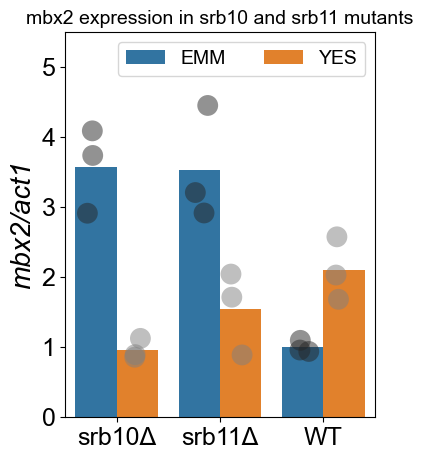

In [17]:
#create a sns striplot where x is sample name, y is normalised quantity, hue is media
import seaborn as sns
#no error bars
fig,ax = plt.subplots(figsize=(4,5))
sns.barplot(x="Sample Name", y="normalised by WT YES", hue="media", data=final, ci=None)
#big jitter
sns.stripplot(x="Sample Name", y="normalised by WT YES", hue="media", data=final, dodge=True, color=".5", size=15, alpha=.5, jitter=0.2)
#only keep first 2 legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', ncol=2, fontsize=14)
plt.title("mbx2 expression in srb10 and srb11 mutants", fontsize=14)
plt.xlabel("")
plt.ylabel("mbx2/act1", fontsize=20, style='italic')
#x tick larger
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#ylim 4.5
plt.ylim(0,5.5)

plt.show()
#save as svg and png
fig.savefig(root + 'Figures/All figures/qpcr_mbx2_srb10_11.svg', format='svg',dpi=400)
fig.savefig(root + 'Figures/All figures/qpcr_mbx2_srb10_11.png', format='png',dpi=400)

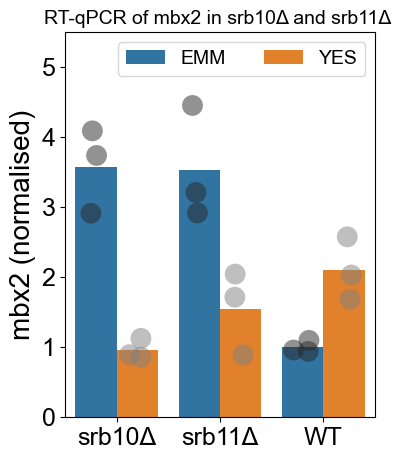

In [11]:
#create a sns striplot where x is sample name, y is normalised quantity, hue is media
import seaborn as sns
#no error bars
fig,ax = plt.subplots(figsize=(4,5))
sns.barplot(x="Sample Name", y="normalised by WT YES", hue="media", data=final, ci=None)
#big jitter
sns.stripplot(x="Sample Name", y="normalised by WT YES", hue="media", data=final, dodge=True, color=".5", size=15, alpha=.5, jitter=0.2)
#only keep first 2 legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right', ncol=2, fontsize=14)
plt.title("RT-qPCR of mbx2 in srb10Δ and srb11Δ ", fontsize=14)
plt.xlabel("")
plt.ylabel("mbx2 (normalised)", fontsize=20)
#x tick larger
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#ylim 4.5
plt.ylim(0,5.5)

plt.show()